In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [4]:
df['overweight'] = np.where((df['weight'] / (df['height']/100)**2 > 25), 1, 0)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [5]:
df_cat = pd.melt(df, id_vars=['cardio', 'id'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,id,variable,value
0,0,0,active,1
1,1,1,active,1
2,1,2,active,0
3,1,3,active,1
4,0,4,active,0
...,...,...,...,...
419995,0,99993,smoke,1
419996,1,99995,smoke,0
419997,1,99996,smoke,0
419998,1,99998,smoke,0


In [6]:
df_cat['count'] = df_cat.groupby(['cardio', 'variable', 'value'])['id'].transform('count')
df_cat

,cardio,id,variable,value,count
0,0,0,active,1,28643
1,1,1,active,1,27618
2,1,2,active,0,7361
3,1,3,active,1,27618
4,0,4,active,0,6378
...,...,...,...,...,...
419995,0,99993,smoke,1,3240
419996,1,99995,smoke,0,32050
419997,1,99996,smoke,0,32050
419998,1,99998,smoke,0,32050


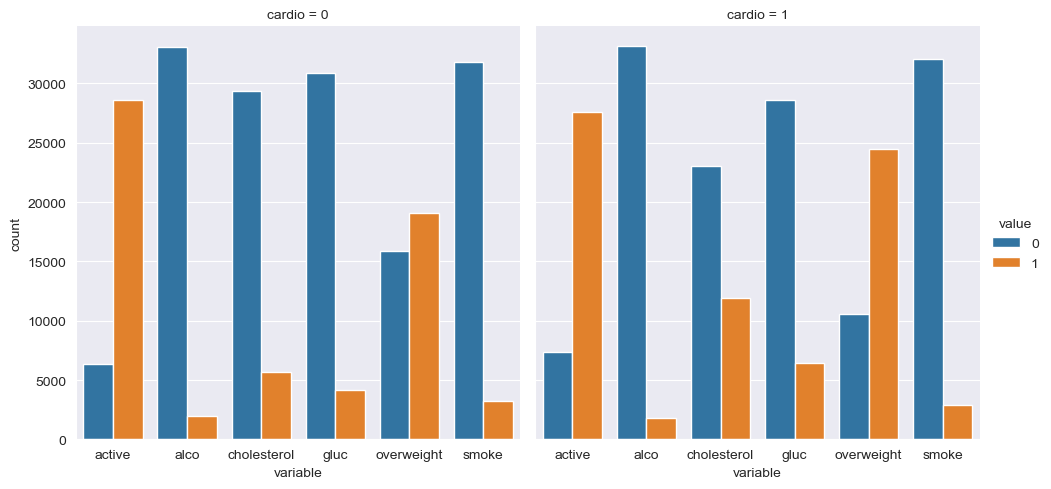

In [7]:
sns.catplot(data=df_cat, x='variable', y='count', col='cardio', hue='value', kind='bar')
plt.show()